# __Todo sobre el Analisis de Componentes Principales (PCA)__

## Como Funciona?

Supongamos que tenemos un dataset con solo 2 variables (x1 y x2) y 3 observaciones (A, B y C):

| Observación | x1 | x2 |
| ----------- | -- | -- |
| A           | 2  | 4  |
| B           | 0  | 0  |
| C           | -2 | -4 |

Vemos que x2 es el doble de x1 , es decir, ambas variables esta correlacionadas. PCA detectara esta correlacion.

### Paso 1: _Estandarizar los datos_

Realizamos este proceso para que PCA no esté sesgado por las escalas de las variables. Utilizamos la formula de la desviacion estandar ($z$) y de la varianza poblacional ($\sigma$) ya que son pocos datos:

$$z = \frac{x - \overline{x}}{\sigma}$$

$$\sigma = \sqrt{\frac{1}{n}\sum (x_{i} - \overline{x})^{2}}$$

Calculamos la media y desviacion estandar de cada variable:

- __Media de x1__: (2+0+(-2))/3 = 0
- __Media de x2__: (4+0+(-4))/3 = 0
- __std de x1__:
    - Resta la media a cada dato y elevar al cuadrado:
        
        (2-0)^2 = 4
        
        (0-0)^2 = 0
        
        (-2-0)^2 = 4
        
    - Promedia lo cuadrados dividiendo entre n
        
        varianza = (4 + 0 + 4)/3 = 8/3
        
    - Sacar la raiz cuadrada
        
        std = sqrt(varianza) = (8/3)^1/2 = 1.632
        
- __std de x2__:
    - Resta la media a cada dato y elevar al cuadrado:
        
        (4-0)^2 = 16
        
        (0-0)^2 = 0
        
        (-4-0)^2 = 16
        
    - Promedia lo cuadrados dividiendo entre n
        
        varianza = (16 + 0 + 16)/3 = 32/3
        
    - Sacar la raiz cuadrada
        
        std = sqrt(varianza) = (32/3)^1/2 = 3.266
        
    
Ahora, estandarizamos los datos

| Observación | x1\_std           | x2\_std           |
| ----------- | ----------------- | ----------------- |
| A           | 2 / 1.632 ≈ 1.225 | 4 / 3.266 ≈ 1.225 |
| B           | 0                 | 0                 |
| C           | -1.225            | -1.225            |



### Paso 2: _Calcular Matriz de Covarianza_

Es una matriz cuadrada donde cada valor muestra **cuánto varían dos variables juntas**: Los valores de la diagonal muestran la **varianza** de cada variable, mientras que los valores que estan fuera de la diagonal: muestra la **covarianza entre pares de variables**.

PCA busca encontrar **las direcciones (componentes)** donde los datos tienen mayor **varianza** y **menor redundancia**. Para eso, necesita saber:

- Qué variables están **correlacionadas**.
- Cuánta **varianza total** hay en el sistema.

 La **matriz de covarianza nos da exactamente esa información**.

Tomamos los datos estandarizados y formamos la matriz $Z$:

$$Z = \begin{bmatrix}
1.225  & 1.225 \\
 0 &  0\\
 -1.225 & -1.225 \\
\end{bmatrix}$$

La formula de la matriz de covarianza viene dada por:

$$Cov = \frac{1}{n-1}Z^{T}Z$$

donde:

- $Z^{T}$: es la transpuesta de $Z$.
- $n$: es el numero de observaciones (en este caso, 3).

Tranponemos la matriz $Z$, pasando filas a columnas y viceversa.

$$Z^{T} = \begin{bmatrix}
1.225 & 0 & -1.225 \\
1.225 & 0 & -1.225 \\
\end{bmatrix}$$

Realizamos la operacion de multiplicacion de matrices

$$Z^{T} = \begin{bmatrix}
1.225 & 0 & -1.225 \\
1.225 & 0 & -1.225 \\
\end{bmatrix}$$

Y calculamos cada elemento de la operacion:

- **[0,0]**: 1.2252+02+(−1.225)2=1.5+0+1.5=31.225^2 + 0^2 + (-1.225)^2 = 1.5 + 0 + 1.5 = 31.2252+02+(−1.225)2=1.5+0+1.5=3
- **[0,1]**: igual que [0,0] ⇒ 3
- **[1,0]**: también 3 (simétrico)
- **[1,1]**: también 3

Entonces,

$$ Z^{T}\cdot Z = \begin{bmatrix}
3 & 3 \\
3 & 3 \\
\end{bmatrix}$$

Ahora, dividimos por $n=3$ y obtenemos la Matriz de Covarianza

$$ Cov = C = \begin{bmatrix}
1 & 1 \\
1 & 1 \\
\end{bmatrix}$$


### Paso 3: _Calcular autovalores y autovectores_

Los autovectores nos dicen cuanta varianza captura cada componente; Mientra que lo autovectores indican la direccion de cada componente.

Para calcular los autovalores utilizamos la siguiente ecuacion:

$$det(\mathbf{C} - \lambda\mathbf{I}) = 0$$

donde

$$C = \begin{bmatrix}
1 & 1 \\
1 & 1 \\
\end{bmatrix}, \mathbf{I} = \begin{bmatrix}
1 & 0 \\
0 & 1 \\
\end{bmatrix}$$

Entonces,

$$\begin{vmatrix}
1-\lambda & 1 \\
1 &  1-\lambda\\
\end{vmatrix} = (1 - \lambda)^{2} - 1 = 0$$

Resolviendo la matriz tenemos:

$$(1 - \lambda)^{2} = 1 \Rightarrow  1 - \lambda = \pm  1$$

Por tanto, los autovalores son:

$$\lambda_{1} = 2, \lambda_{2} = 0$$

Ahora, procedemos a calcular los autovectores $\mathbf{v_{1}}$ y $\mathbf{v_{2}}$:

- **Para $\lambda_{1} = 2$**

$$(\mathbf{C} - \lambda_{1}\mathbf{I})\mathbf{v_{1}} = 0$$

$$\begin{bmatrix}
-1 & 1 \\
1 & -1 \\
\end{bmatrix} \cdot \begin{bmatrix}
\mathbf{v_{1}} \\ \mathbf{v_{2}}
\end{bmatrix} = \begin{bmatrix}
0 \\ 0
\end{bmatrix}$$

nos lleva a la ecuacion,

$$-v_{1} + v_{2} = 0 \Rightarrow v_{1} = v_{2}$$

Entonces,

$$\mathbf{v_{1}} = \begin{bmatrix}
1 \\ 1
\end{bmatrix}$$

Normalizando, obtenemos el autorvector $\mathbf{v_{1}}$, 

$$\mathbf{v_{1}} = \frac{1}{\sqrt{2}}\begin{bmatrix}
1 \\ 1
\end{bmatrix} = \begin{bmatrix}
0.707 \\ 0.707
\end{bmatrix}$$

- **Para $\lambda_{2} = 0$**

$$(\mathbf{C} - \lambda_{2}\mathbf{I})\mathbf{v_{2}} = \begin{bmatrix}
1 & 1 \\
1 & 1 \\
\end{bmatrix} \cdot \begin{bmatrix}
\mathbf{v_{1}} \\ \mathbf{v_{2}}
\end{bmatrix} = \begin{bmatrix}
0 \\ 0
\end{bmatrix}$$

nos lleva a la ecuacion,

$$v_{1} + v_{2} = 0 \Rightarrow v_{1} = -v_{2}$$

Un vector solucion seria,

$$\mathbf{v_{2}} = \begin{bmatrix}
1 \\ -1
\end{bmatrix}$$

Normalizando, obtenemos el autorvector $\mathbf{v_{2}}$

$$\mathbf{v_{2}} = \frac{1}{\sqrt{2}}\begin{bmatrix}
1 \\ -1
\end{bmatrix} = \begin{bmatrix}
0.707 \\ -0.707
\end{bmatrix}$$

### Paso 4: _Tranformar los datos_

Proyectamos los datos en los nuevos ejes dados por los componentes principales. Para ello, utilizamos la siguiente formula:

$$Z_{PCA} = Z \cdot \text{Matriz de autovectores}$$

Sustituyendo, tenemos:

$$Z_{PCA} = \begin{bmatrix}
1.225 & 1.225 \\
0 & 0 \\
-1.225 & -1.225 \\
\end{bmatrix} \cdot \begin{bmatrix}
0.707 & -0.707 \\
0.707 & 0.707 \\
\end{bmatrix} = \begin{bmatrix}
1.733 & 0 \\
0 & 0 \\
-1.733 & 0 \\
\end{bmatrix}$$

__Conclusiones__

A partir de la nueva matriz $Z_{PCA}$ podemos concluir lo siguiente:

- Solo la primer componente $(PC1)$ tiene valores ditinto de cero. Esto indica que toda la informacion esta en 1 sola dimension.
 
- La segunda componente $(PC2)$ no agrega nada util: toda su varianza es cero. 

- Esto implica que podemos reducir de 2 a 1 dimension sin perder informacion.

## PCA en el conjunto de datos IRIS

Este conjunto de datos consta de cuatro características: longitud del sépalo, ancho del sépalo, longitud del pétalo y ancho del pétalo. Utilizamos el análisis de componentes principales (PCA) para proyectar este espacio de cuatro características en un espacio tridimensional.

### Cargar datos

In [ ]:
from sklearn.datasets import load_iris

# a_frame, muetra los datos en formato df
iris = load_iris(as_frame=True)
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

### Grafico de pares de caracteristicas

In [ ]:
iris.frame['target']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

El target esta identificado con numeros enteros para cada especie. Vamos a renombrar el target con el nombre real de las especies

In [11]:
iris.frame['target'] = iris.target_names[iris.target]
iris.frame['target']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: target, Length: 150, dtype: object

Graficamos pares de caracteristicas de todas las especies entre si.

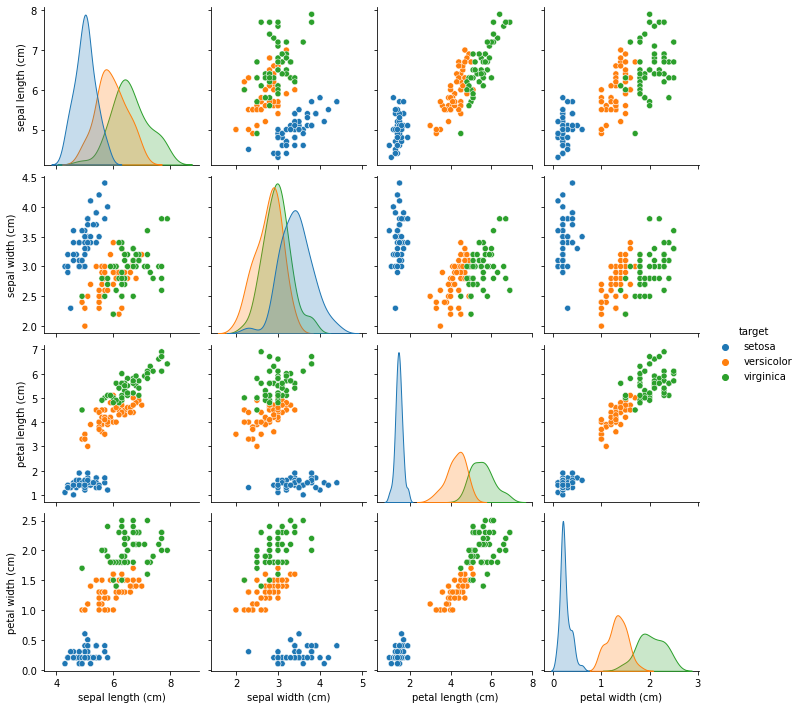

In [12]:
import seaborn as sns

_ = sns.pairplot(iris.frame, hue='target')

> Ya se puede observar un patrón en el tipo Setosa, fácilmente identificable por su sépalo corto y ancho. 

> Considerando únicamente estas dos dimensiones (ancho y largo del sépalo), aún existe una superposición entre los tipos Versicolor y Virginica.

> Observamos que el ancho y la longitud del pétalo son las características más discriminantes para los tres tipos.

### Representacion Grafica PCA

Apliquemos un Análisis de Componentes Principales (PCA) al conjunto de datos del iris y luego grafiquemos los iris en las tres primeras dimensiones del PCA. Esto nos permitirá diferenciar mejor los tres tipos.

El objetivo es reducir los datos de iris de 4 a 3 dimensiones y graficarlos en 3D.

In [15]:
from sklearn.decomposition import PCA

# aplicar PCA para reducir a 3d
X_reduce = PCA(n_components=3).fit_transform(iris.data)

# mostrar primeras 3 transformaciones
X_reduce[:3]

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026]])

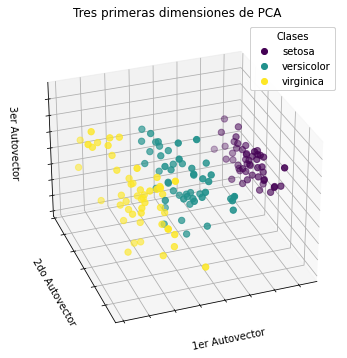

In [17]:
import matplotlib.pyplot as plt

# crear grafico
fig = plt.figure(1, figsize=(8,6))
# elev y azim definen el angulo de la vista
ax = fig.add_subplot(111, projection='3d', elev=-150, azim=110)

# Graficar datos en 3D
scatter = ax.scatter(
    X_reduce[:, 0],
    X_reduce[:, 1],
    X_reduce[:, 2],
    c=iris.target,  # colorear cada punto segun la clase
    s=40            # size de los puntos
)

ax.set(
    title = 'Tres primeras dimensiones de PCA',
    xlabel = '1er Autovector',
    ylabel = '2do Autovector',
    zlabel = '3er Autovector',
)

# ocultar etiquetas numericas en los ejes
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

# agregar leyenda
leyend1 = ax.legend(
    scatter.legend_elements()[0],
    iris.target_names.tolist(),
    loc='upper right',
    title='Clases'
)
ax.add_artist(leyend1)

plt.show()


> PCA crea tres nuevas características que son una combinación lineal de las cuatro características originales.

> Esta transformación maximiza la varianza lo que permite identificar cada especie utilizando únicamente la primera característica

## PCA Incremental

IPCA se utiliza generalmente como sustituto del análisis de componentes principales (PCA) cuando el conjunto de datos a descomponer es demasiado grande para caber en la memoria.  Si bien sigue dependiendo de las características de los datos de entrada, modificar el tamaño del lote permite controlar el uso de la memoria.

No escala los datos de entrada, como PCA.

El siguiente ejemplo muestra de forma visual que el IPCA es capaz de encontrar una proyección de datos similar a la del PCA (a una inversión de signo), procesando solo unas pocas muestras a la vez.

Vamos a utilizar los datos de Iris pero en este caso vamos a pasar de 4 a 2 dimensiones.

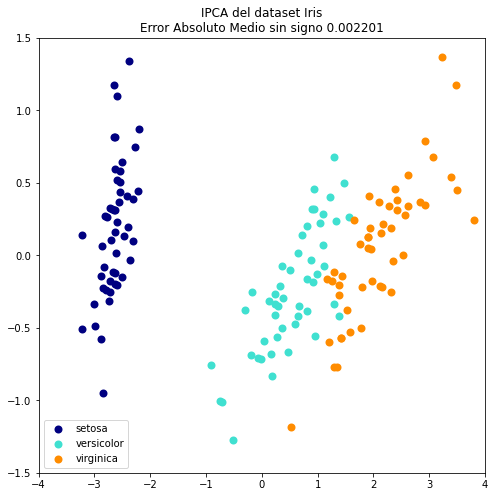

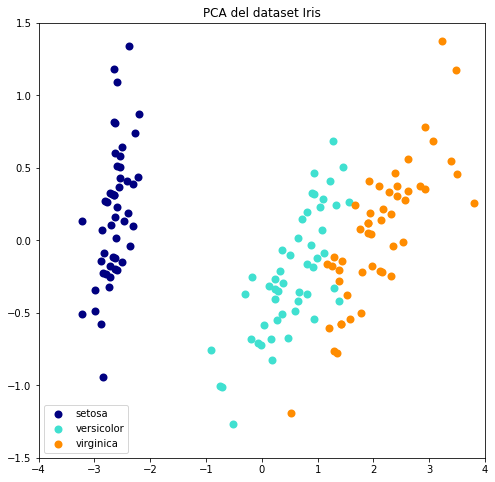

In [20]:
import numpy as np
from sklearn.decomposition import PCA, IncrementalPCA

# dividimos los datos en features y target
X = iris.data
y = iris.target

# Aplicamos IPCA
n_componentes = 2
ipca = IncrementalPCA(n_components=n_componentes, batch_size=10)
X_ipca = ipca.fit_transform(X)

# Aplicamos PCA
pca = PCA(n_components=n_componentes)
X_pca = pca.fit_transform(X)

# lista de colores para cada clase
colores = ['navy', 'turquoise', 'darkorange']

for X_tranformed, title in [(X_ipca, 'IPCA'), (X_pca, 'PCA')]:
    
    plt.figure(figsize=(8,8))
    for color, i, target_name in zip(colores, [0,1,2], iris.target_names):

        plt.scatter(
            X_tranformed[y == i, 0],
            X_tranformed[y == i, 1],
            color = color,
            lw = 2,
            label = target_name
        ) 

    if 'IPCA' in title:
        err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
        plt.title(title + ' del dataset Iris\nError Absoluto Medio sin signo %.6f' % err)
    else:
        plt.title(title + ' del dataset Iris')
    
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.axis([-4,4,-1.5,1.5])

plt.show()

> El error absoluto medio es muy bajo lo que implica que ambos metodos son muy parecidos.

> IPCA aproxima bastante bien a PCA pero con menos consumo de memoria.